# Mer om numerisk derivasjon

Når vi bruker sensorer, så er det ikke alltid slik at alle målingene har like lang tid mellom seg. La oss derfor finne ut hvordan vi deriverer et slikt signal numerisk.

In [1]:
from pylab import arange, sin, plot, show

Den originale derivasjonsfunksjonen vår så slik ut:

In [2]:
def deriver(avstandsmålinger, dt):
    antall_målinger = len(avstandsmålinger)
    fart = zeros(antall_målinger-1)
    
    for t in range(antall_målinger-1):
        fart[t] = (avstandsmålinger[t+1] - avstandsmålinger[t])/dt
        
    return fart

men hvis det er ulik tid mellom hver måling, så har vi jo ikke en konstant tidsendring. La oss derfor modifisere `deriver`-funksjonen vår slik at den tar inn en tids-array og og deler på tindsendringen i tillegg til avstandsendringen!

In [3]:
def deriver_ulik_tidsmellomrom(tidspunkt, avstandsmålinger):
    antall_målinger = len(avstandsmålinger)
    fart = zeros(antall_målinger-1)
    
    for t in range(antall_målinger-1):
        dt = tidspunkt[t+1] - tidspunkt[t]
        fart[t] = (avstandsmålinger[t+1] - avstandsmålinger[t])/dt
        
    return fart

Her ser vi at den eneste endringen her er at vi tar inn en array med tidspunkt for målingene og regner ut tidsendringen manuelt for hver farts-utregning.

## Raskere derivasjon

Et annet problem med derivasjonskoden vår er at den er treg. Hvis vi bare bruker den for å derivere matematiske funksjoner går det greit, men hvis vi f.eks. vil finne kanter i bilder fra et web-camera, så må vi har raskere kode. Dette kan vi få til med å bruke det som heter for *array slicing*, eller array-skjæring på norsk. Grunnen til at det har det navnet er at vi "skjærer ut" deler av en array som vi bruker videre. La oss se på et eksempel først før vi bruker det for å derivere raskt.

Vi starter med en tallrekke:

In [4]:
tallrekke = arange(0, 1, 0.1)

print(tallrekke)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Så vil vi hente ut element med index 3, 4 og 5. Da kan vi skrive dette

In [5]:
delrekke = tallrekke[3:6]

print(delrekke)

[0.3 0.4 0.5]


Her ser vi altså elementene med indeks 3, 4 og 5. Hva skjedde her egentlig? Vel linja `delrekke = tallrekke[3:6]` sier at vi skal skjære ut den delen av `tallrekke`-variabelen som har indeks mellom 3 og 6. Siden Python teller fra og med til til, men ikke med, så får vi altså den delen av `tallrekke`-variabelen som har indeks 3, 4 og 5.

La oss nå se hvordan vi kan bruke slik slicing for å hente ut alle tall fra en tallrekke untatt det første:

In [6]:
delrekke_uten_første_tall = tallrekke[1:]

print(delrekke_uten_første_tall)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Koden over lagde altså en ny array som har alle tallene unntatt det første. Måten det skjedde på var at vi skrev `tallrekke[1:]`. Den kodesnutten betyr at vi skal ta ut alle tall fra `tallrekke`-variabelen som har indeks fra og med 1, siden vi ikke har noe etter kolonet sier vi ikke hva den skal gå til, og derfor får vi resten av tallrekka.

Neste steg er å hente ut alle tall fra tallrekka unntatt det siste.

In [7]:
antall_tall = len(tallrekke)
delrekke_uten_siste_tall = tallrekke[:antall_tall - 1]

print(delrekke_uten_siste_tall)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


I denne koden finner vi først ut hvor mange tall som er i tallrekka, så ber vi om alle tall til, men ikke med, det tallet med den siste indeksen. Dette er litt tungvindt å skrive, så vi kan bruke et lite triks!

In [8]:
delrekke_uten_siste_tall = tallrekke[:-1]

print(delrekke_uten_siste_tall)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]


Dette gir jo ikke helt mening. Vi vil ha alle tall med indeks til, men ikke med -1? Vel, i Python er det å skrive `tallrekke[:-1]` en snarvei for å skrive `tallrekke[:(len(tallrekke) - 1)]`. Dette kan virke rart til å begynne med, men jeg liker å tenke på det som at med negative indekser starter vi på slutten av arrayet og teller oss baklengs.

### Regne differanser med slicing
Det som er så praktisk med slicing er at vi kan bruke det for å regne ut mange differanser "samtidig". Dette gjør vi ved å hente ut en tallrekke uten det første tallet og trekke fra tallrekka vi får ved å fjerne det siste tallet. Figuren under forklarer hvorfor dette fungerer

<img src="https://raw.githubusercontent.com/kodeskolen/tekna_h21_videre/main/dag2/notebooks_dag2/Numerisk derivasjon/bilder/slicing.png" width="600px" >

La oss nå teste ut dette med litt Python kode

In [9]:
differanser = tallrekke[1:] - tallrekke[:-1]

print(differanser)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


Hvis vi nå har tidspunktet mellom hver måling, så kan vi bare dele på det for å regne ut den deriverte. La oss si at vi har 10 målinger i sekundet.

In [10]:
differanser = tallrekke[1:] - tallrekke[:-1]
dt = 1/10  # 10 målinger i sekundet
derivert = differanser/dt

print(derivert)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


Vi kan også bruke dette trikset for å regne ut den deriverte med ulik tid mellom hver måling. La oss se et eksempel på det.

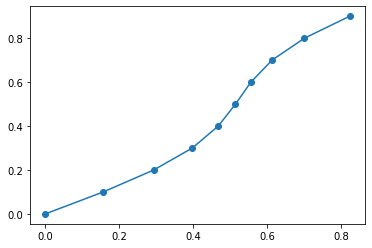

In [11]:
tid = tallrekke + 0.1*sin(tallrekke*6)
strekning = tallrekke

plot(tid, strekning, '-o')
show()

Her har vi altså tidpunkt som er ugjevnt fordelt utover x-aksen. Dette kan for eksempel skje om man måler hvor lang tid det tar å løpe en konstant lengde. La oss nå derivere dette

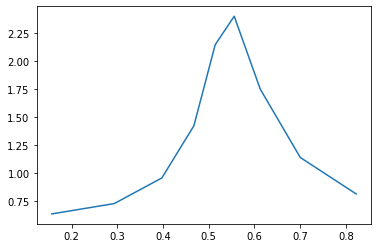

In [12]:
streknings_differanse = strekning[1:] - strekning[:-1]
tids_differanse = tid[1:] - tid[:-1]

derivert = streknings_differanse/tids_differanse
plot(tid[1:], derivert)
show()